In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

# Create sequential data
data = np.array([1, 2, 3, 4, 5, 6, 7])
seq_len = 3
sequences = []
labels = []

# Create sequences like [1, 2, 3], [2, 3, 4], etc., and labels [4, 5, 6, 7]
for i in range(len(data) - seq_len):
    sequences.append(data[i:i+seq_len])
    labels.append(data[i+seq_len])

# Convert to tensors
sequences = torch.tensor(sequences, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32).reshape(-1, 1)

print("Sequences:\n", sequences)
print("Labels:\n", labels)


Sequences:
 tensor([[1., 2., 3.],
        [2., 3., 4.],
        [3., 4., 5.],
        [4., 5., 6.]])
Labels:
 tensor([[4.],
        [5.],
        [6.],
        [7.]])


/var/folders/4w/t_rs_h2144q0rmw1kx3__qsc0000gn/T/ipykernel_29111/2167546966.py:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  sequences = torch.tensor(sequences, dtype=torch.float32)


In [2]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        # Define the RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        # Define the output layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # RNN produces an output and a hidden state
        rnn_out, hidden = self.rnn(x)
        # We use the last output of the sequence for prediction
        out = self.fc(rnn_out[:, -1, :])
        return out

# Initialize the model
input_size = 1   # 1 because we are feeding 1 number at each time step
hidden_size = 10 # Number of neurons in the hidden layer
output_size = 1  # Predicting one number
model = SimpleRNN(input_size, hidden_size, output_size)

print(model)


SimpleRNN(
  (rnn): RNN(1, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


Epoch [50/200], Loss: 1.2366
Epoch [100/200], Loss: 1.2237
Epoch [150/200], Loss: 1.1095
Epoch [200/200], Loss: 0.2168


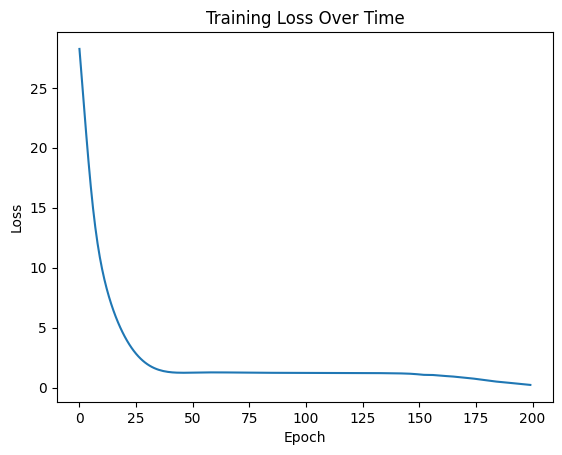

In [3]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Reshape the sequences to match RNN input requirements (batch_size, seq_len, input_dim)
sequences = sequences.unsqueeze(-1)

# Training the model
epochs = 200
losses = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(sequences)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss for plotting
    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plot the training loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()
